<a href="https://colab.research.google.com/github/iam-arshpreet/cap-comp215/blob/main/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

COMP 215 - LAB 1
----------------
#### Name:
#### Date:

This lab exercise is mostly to introduce some of the power in Jupyter Notebooks.
Note that a Notebook is composed of "cells" - some are "text", like this one, while others are "code"

We'll also review some basic data types (like `int` and `str`) and data structures (like `list` and `dict`)

**New Python Concepts**:
  * `datetime.date` objects represent a calendar date (these are very powerful)
  * *list comprehension* provides a compact way to represent map and filter algorithms

As will be usual, the fist code cell, below, simply imports all the modules we'll be using...

In [58]:
import datetime, json, requests
import matplotlib.pyplot as plt
import  matplotlib.dates as mdates
from pprint import pprint    # Pretty Print - built-in python function to nicely format data structures

### API Query

Now, let's fetch some Covid-19 daily case-count data from the Open Covid API:  https://opencovid.ca/api/

Query:
  - `stat=cases`        # the type of data to fetch
  - `loc=BC`            # the location to fetch data for
  - `after=2023-11-01`  # since the 1st of november (note date format:  yyyy-mm-dd)

In [59]:
query = 'https://api.opencovid.ca/timeseries?stat=cases&loc=BC&after=2023-11-01'

response = requests.request("GET", query, headers={}, data={})
print('Response data type:', type(response.text))
response.text[:1000]

Response data type: <class 'str'>


'{"data":{"cases":[{"name":"cases","region":"BC","date":"2023-11-01","value":410535,"value_daily":91},{"name":"cases","region":"BC","date":"2023-11-02","value":410607,"value_daily":72},{"name":"cases","region":"BC","date":"2023-11-03","value":410682,"value_daily":75},{"name":"cases","region":"BC","date":"2023-11-04","value":410756,"value_daily":74},{"name":"cases","region":"BC","date":"2023-11-05","value":410822,"value_daily":66},{"name":"cases","region":"BC","date":"2023-11-06","value":410915,"value_daily":93},{"name":"cases","region":"BC","date":"2023-11-07","value":410989,"value_daily":74},{"name":"cases","region":"BC","date":"2023-11-08","value":411055,"value_daily":66},{"name":"cases","region":"BC","date":"2023-11-09","value":411127,"value_daily":72},{"name":"cases","region":"BC","date":"2023-11-10","value":411184,"value_daily":57},{"name":"cases","region":"BC","date":"2023-11-11","value":411234,"value_daily":50},{"name":"cases","region":"BC","date":"2023-11-12","value":411300,"va

Notice that the response looks like a dictionary, but is actually just a string of text (most data is exchanged on the web as plain text!).  This particular data format is called "[JSON](https://en.wikipedia.org/wiki/JSON)"

The `json.loads` function "parses" such text and loads the data into a dictionary...

In [60]:
result = json.loads(response.text)
pprint(result)   # pretty-print the entire data structure we got back...

{'data': {'cases': [{'date': '2023-11-01',
                     'name': 'cases',
                     'region': 'BC',
                     'value': 410535,
                     'value_daily': 91},
                    {'date': '2023-11-02',
                     'name': 'cases',
                     'region': 'BC',
                     'value': 410607,
                     'value_daily': 72},
                    {'date': '2023-11-03',
                     'name': 'cases',
                     'region': 'BC',
                     'value': 410682,
                     'value_daily': 75},
                    {'date': '2023-11-04',
                     'name': 'cases',
                     'region': 'BC',
                     'value': 410756,
                     'value_daily': 74},
                    {'date': '2023-11-05',
                     'name': 'cases',
                     'region': 'BC',
                     'value': 410822,
                     'value_daily': 66},
               

### Extract data items from a list of dictionaries
Next we use "list comprehension" to extract the list of dates and associated cases into "parallel lists"

Notice how we "parse" the date strings, using `strptime`, into a real date objects so they are easier to work with (format: yyyy-mm-dd)

In [61]:
cases = result['data']['cases']
case_dates = [daily['date'] for daily in cases]     # List Comprehension #1: extract the case date strings
n_cases = [daily['value_daily'] for daily in cases] # List Comprehension #2:  extract the case counts

print('Dates:', case_dates[:10])      # do you recall the "slice" operation?  If not, look it up in the ThinkCsPy textbook!
print('Cases:', n_cases[:10])
print('Zipped:', list(zip(case_dates[:10], n_cases[:10])))  # zip is a very handy function to "zip" 2 lists together like a zipper...

Dates: ['2023-11-01', '2023-11-02', '2023-11-03', '2023-11-04', '2023-11-05', '2023-11-06', '2023-11-07', '2023-11-08', '2023-11-09', '2023-11-10']
Cases: [91, 72, 75, 74, 66, 93, 74, 66, 72, 57]
Zipped: [('2023-11-01', 91), ('2023-11-02', 72), ('2023-11-03', 75), ('2023-11-04', 74), ('2023-11-05', 66), ('2023-11-06', 93), ('2023-11-07', 74), ('2023-11-08', 66), ('2023-11-09', 72), ('2023-11-10', 57)]


### Datetime.date
Working with date stings is a pain.  So many formats!  Even within Canada, you might see:
"Jan. 9, 2023" or "09-01-2023" or "2023-01-09" or ....
Imagine trying to do a calculation like "how many days between these 2 dates"!!
The build-in `datetime` package makes working with dates much easier.
  * step 1: "parse" the date string data (`strptime` ==  "string-parse-datetime object")
  * step 2: get the date part (i.e., without the time)

In [62]:
# parse a datetime object from a string by supplying the correct "format" string.
datetime_objects = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in case_dates]  # List Comprehension #3
# but we only need the "date" part...
dates = [dt.date() for dt in datetime_objects]
dates[:10]

[datetime.date(2023, 11, 1),
 datetime.date(2023, 11, 2),
 datetime.date(2023, 11, 3),
 datetime.date(2023, 11, 4),
 datetime.date(2023, 11, 5),
 datetime.date(2023, 11, 6),
 datetime.date(2023, 11, 7),
 datetime.date(2023, 11, 8),
 datetime.date(2023, 11, 9),
 datetime.date(2023, 11, 10)]

## Exercise 1

In the code cell below, re-write each of the 3 "List Comprehensions" in the code cells above as a loop so you understand how they work.

Notice that a "list comprehension" is a compact way to write a "list accumulator" algorithm (and more efficient too!)

In [63]:
# Ex. 1 your code here
# 1.
case_dates = []
for daily in cases:
  case_dates.append(daily['date'])
print(case_dates)

# 2.
no_cases = []
for daily in cases:
  no_cases.append(daily['value_daily'])
print(no_cases)




['2023-11-01', '2023-11-02', '2023-11-03', '2023-11-04', '2023-11-05', '2023-11-06', '2023-11-07', '2023-11-08', '2023-11-09', '2023-11-10', '2023-11-11', '2023-11-12', '2023-11-13', '2023-11-14', '2023-11-15', '2023-11-16', '2023-11-17', '2023-11-18', '2023-11-19', '2023-11-20', '2023-11-21', '2023-11-22', '2023-11-23', '2023-11-24', '2023-11-25', '2023-11-26', '2023-11-27', '2023-11-28', '2023-11-29', '2023-11-30', '2023-12-01', '2023-12-02', '2023-12-03', '2023-12-04', '2023-12-05', '2023-12-06', '2023-12-07', '2023-12-08', '2023-12-09', '2023-12-10', '2023-12-11', '2023-12-12', '2023-12-13', '2023-12-14', '2023-12-15', '2023-12-16', '2023-12-17', '2023-12-18', '2023-12-19', '2023-12-20', '2023-12-21', '2023-12-22', '2023-12-23', '2023-12-24', '2023-12-25', '2023-12-26', '2023-12-27', '2023-12-28', '2023-12-29', '2023-12-30']
[91, 72, 75, 74, 66, 93, 74, 66, 72, 57, 50, 66, 63, 45, 45, 51, 52, 41, 42, 63, 67, 62, 51, 51, 46, 49, 59, 59, 38, 42, 54, 54, 54, 63, 49, 80, 74, 49, 50, 43

### Generating a plot

Finally, we'll plot the (dates,cases) data as a nice x-y line graph.

The code to format the x-axis labels is taken from https://matplotlib.org/stable/gallery/ticks/date_concise_formatter.html

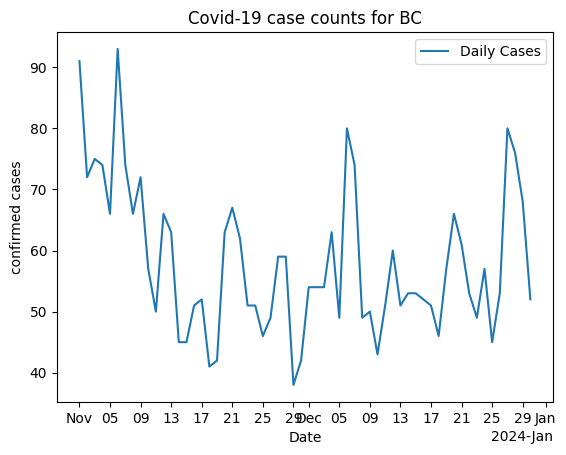

In [64]:
def format_date_axis(ax):
  """ format the dates shown on the x-axis of given axes, ax  """
  locator = mdates.AutoDateLocator(minticks=10, maxticks=20)
  formatter = mdates.ConciseDateFormatter(locator)
  ax.xaxis.set_major_locator(locator)
  ax.xaxis.set_major_formatter(formatter)

fig, ax = plt.subplots()
format_date_axis(ax)
ax.plot(dates, n_cases, label='Daily Cases')  # Plot some data on the axes.
ax.set(
  title="Covid-19 case counts for BC",  # Add a title to the plot.
  xlabel='Date',                        # Add a label to X axes.
  ylabel='confirmed cases'             # Add a label to Y axes.
)
ax.legend();

## Exercise 2

Repeat the analysis above, but this time only for Vancouver Coastal Health Region.

* Make a copy of just the relevant parts of the code above, leaving out all the explanations and extra data dumps.
* You can get the ***hruid*** location code for each health region here:  https://github.com/ccodwg/CovidTimelineCanada/blob/main/geo/hr.csv
* Generalize this code a little to make it easier to repeat the analysis for different locations.  
  If you get that working, also make it easy to run the analysis for different dates?


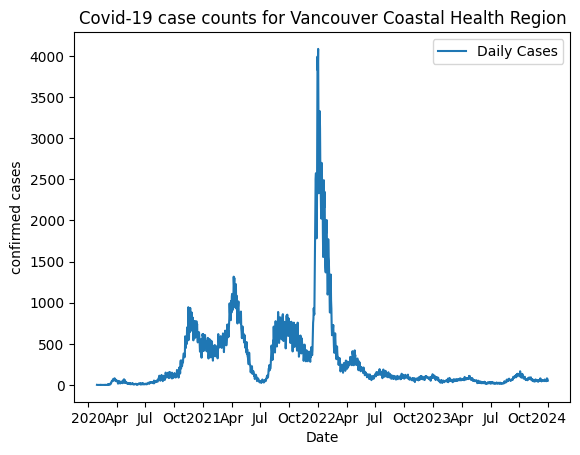

In [65]:
# Ex. 2 your code here

import datetime, json, requests
import matplotlib.pyplot as plt
import  matplotlib.dates as mdates

query = 'https://api.opencovid.ca/timeseries?stat=cases&loc=BC&hruid=1307'
response = requests.request("GET", query, headers={}, data={})
response.text[:1000]

resulting = json.loads(response.text)

cases_2 = resulting['data']['cases']
case_dates_2 = [m['date'] for m in cases_2]
n_cases_2 = [n['value_daily'] for n in cases_2]

datetime_objects_2 = [datetime.datetime.strptime(o, '%Y-%m-%d') for o in case_dates_2]

dates_2 = [dt.date() for dt in datetime_objects_2]
list(zip(dates_2[:20], n_cases_2))

def format_date_axis(ax):
  """ format the dates shown on the x-axis of given axes, ax  """
  locator= mdates.AutoDateLocator(minticks=10, maxticks=20)
  formatter = mdates.ConciseDateFormatter(locator)
  ax.xaxis.set_major_locator(locator)
  ax.xaxis.set_major_formatter(formatter)

fig, ax = plt.subplots()
format_date_axis(ax)
ax.plot(dates_2, n_cases_2, label='Daily Cases')
ax.set(
  title="Covid-19 case counts for Vancouver Coastal Health Region",
  xlabel='Date',
  ylabel='confirmed cases'
)
ax.legend()


## Challenge Exercise - Take your skills to the next level...

## Exercise 3

Notice that the data plot looks quite erratic.  These swings most likely represent artifacts attributable to the reporting process rather than actual changes in infection rates.

 * One way to fix this is is to "smooth" the date with a "7-day rolling average".
Each day, we take the average of the previous 7 days cases.
 * Add new code cell below, compute the 7-day rolling average for each day from the cases list.
 * Create a plot to display the rolling average data and compare your plot with the one produced above.

 Hints: you are free to do this however you like, but a quite elegant solution uses list comprehension, range, and slices

In [66]:
# Ex. 3 (challenge) your code here
